Objective: To explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading strategies.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
traders_df=pd.read_csv("E:\\DS_Projects\\historical_data.csv")

sentiment_df=pd.read_csv("E:\\DS_Projects\\fear_greed_index.csv")


In [107]:
traders_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [113]:
sentiment_df.head()

,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


## Convert timestamp in sentiment data (handle various formats)


In [110]:
# Convert timestamp in sentiment data (handle various formats)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Convert timestamp in trader data (assuming it's in milliseconds)
traders_df['time'] = pd.to_datetime(traders_df['Timestamp'], unit='ms', errors='coerce')

# Optional: round time to date to simplify merging
traders_df['date'] = traders_df['time'].dt.date
sentiment_df['date'] = sentiment_df['Date'].dt.date

In [120]:
merged_df = pd.merge(traders_df, sentiment_df, on='date', how='inner')

In [121]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,time,date,timestamp,value,classification,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.000000,...,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.000000,...,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.000000,...,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.000000,...,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.000000,...,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20,2024-10-27,1730007000,74,Greed,2024-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184258,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.13,551.77,BUY,18-04-2025 20:03,-1797.880000,Close Short,-82.883731,...,False,0.055176,6.900000e+14,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184259,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,7.50,1002.00,BUY,18-04-2025 20:03,-1793.750000,Close Short,-150.515250,...,False,0.100200,6.610000e+13,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184260,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,3.93,525.05,BUY,18-04-2025 20:03,-1786.250000,Close Short,-78.869991,...,False,0.052504,1.010000e+15,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19
184261,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.6000,4.34,579.82,BUY,18-04-2025 20:03,-1782.320000,Close Short,-87.098158,...,False,0.057982,2.700000e+13,1.740000e+12,2025-02-19 21:20:00,2025-02-19,1739943000,44,Fear,2025-02-19


Exploratory Data Analysis (EDA):
Counting trades by sentiment (fear vs greed)
Comparing closedPnL under each sentiment
Using sns.pairplot() or groupby() for patterns

In [122]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean()
print(avg_pnl)

classification
Extreme Greed    25.418772
Fear             50.047622
Greed            87.894859
Neutral          22.229713
Name: Closed PnL, dtype: float64


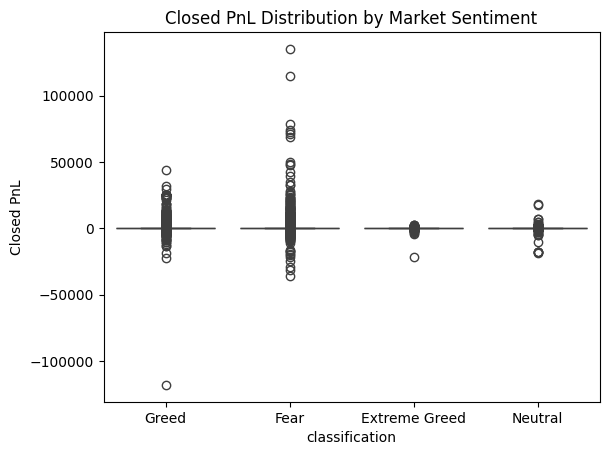

In [124]:
# Boxplot of Closed PnL by sentiment
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Closed PnL Distribution by Market Sentiment')
plt.show()

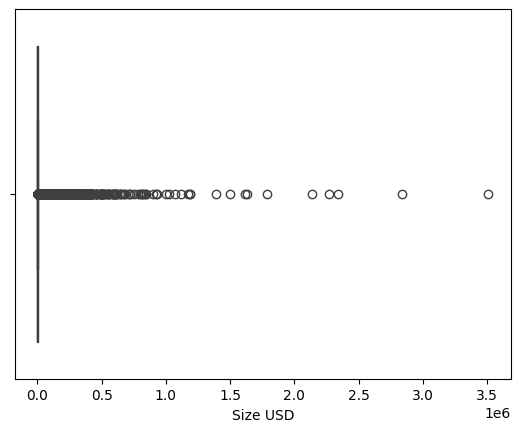

In [131]:
#Check outliers in Size USD
sns.boxplot(x=merged_df['Size USD'])
plt.show()

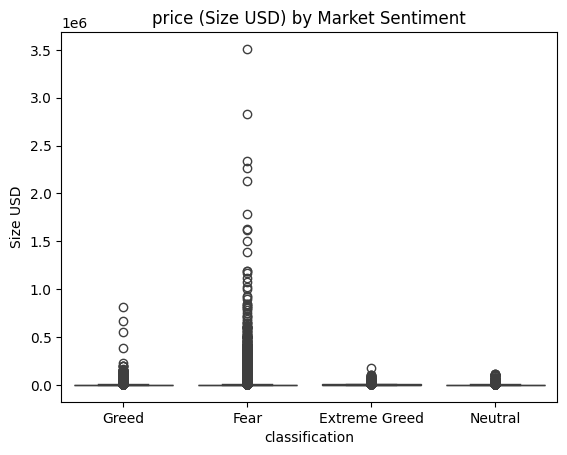

In [133]:
# Boxplot of Size USD by sentiment
sns.boxplot(x='classification', y='Size USD', data=merged_df)
plt.title('price (Size USD) by Market Sentiment')
plt.show()

In [127]:
Fee_effect = merged_df.groupby('Crossed')['Fee'].mean()
print(Fee_effect)

Crossed
False    0.228716
True     1.511753
Name: Fee, dtype: float64


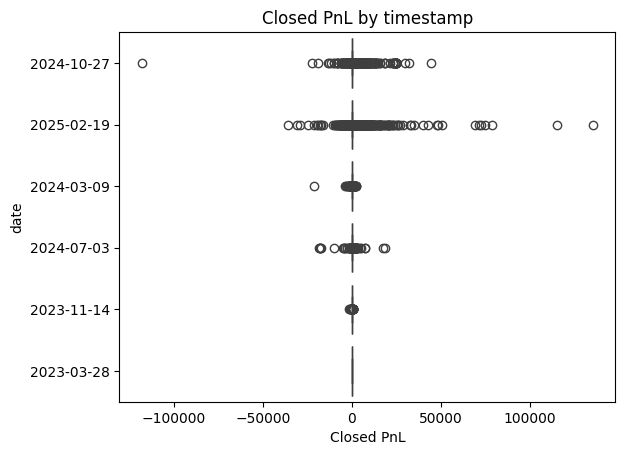

In [128]:
# Boxplot of Closed PnL by sentiment
sns.boxplot(x='Closed PnL', y='date', data=merged_df)
plt.title('Closed PnL by timestamp')
plt.show()

In [141]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184263 entries, 0 to 184262
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           184263 non-null  object        
 1   Coin              184263 non-null  object        
 2   Execution Price   184263 non-null  float64       
 3   Size Tokens       184263 non-null  float64       
 4   Size USD          184263 non-null  float64       
 5   Side              184263 non-null  object        
 6   Timestamp IST     184263 non-null  object        
 7   Start Position    184263 non-null  float64       
 8   Direction         184263 non-null  object        
 9   Closed PnL        184263 non-null  float64       
 10  Transaction Hash  184263 non-null  object        
 11  Order ID          184263 non-null  int64         
 12  Crossed           184263 non-null  bool          
 13  Fee               184263 non-null  float64       
 14  Trad

In [142]:
merged_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp,time,timestamp,value,Date
count,184263.000000,1.842630e+05,1.842630e+05,1.842630e+05,184263.000000,1.842630e+05,184263.000000,1.842630e+05,1.842630e+05,184263,1.842630e+05,184263.000000,184263
mean,9624.179560,4.588772e+03,4.780733e+03,1.634172e+04,55.492690,6.690028e+10,1.003504,5.627655e+14,1.735951e+12,2025-01-04 00:37:39.084026880,1.735909e+09,51.623484,2025-01-03 07:20:19.420068608
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12,2023-03-28 10:40:00,1.679981e+09,44.000000,2023-03-28 00:00:00
25%,5.024600,3.650000e+00,1.875300e+02,-1.189096e+02,0.000000,5.728456e+10,0.015936,2.810000e+14,1.730000e+12,2024-10-27 03:33:20,1.730007e+09,44.000000,2024-10-27 00:00:00
50%,17.770000,3.400000e+01,5.927400e+02,3.701700e+02,0.000000,7.247926e+10,0.087527,5.620000e+14,1.740000e+12,2025-02-19 21:20:00,1.739943e+09,44.000000,2025-02-19 00:00:00
75%,28.920000,1.803000e+02,2.032705e+03,1.264308e+04,6.602400,7.931359e+10,0.387603,8.460000e+14,1.740000e+12,2025-02-19 21:20:00,1.739943e+09,50.000000,2025-02-19 00:00:00
max,109004.000000,1.582244e+07,3.509753e+06,3.050948e+07,135329.090100,8.736651e+10,539.021456,1.130000e+15,1.740000e+12,2025-02-19 21:20:00,1.739943e+09,84.000000,2025-02-19 00:00:00
std,27106.266497,1.105144e+05,2.690428e+04,3.938825e+05,937.857954,1.807788e+10,5.152379,3.257472e+14,7.833952e+09,NaN,7.819074e+06,13.394326,NaN


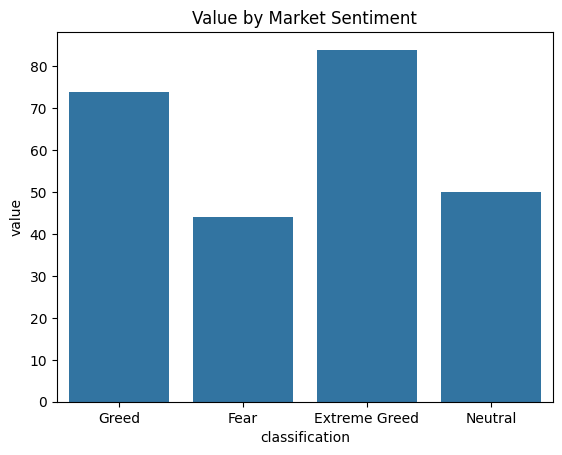

In [160]:
# Boxplot of Value by sentiment
sns.barplot(x='classification', y='value', data=merged_df)
plt.title('Value by Market Sentiment')
plt.show()

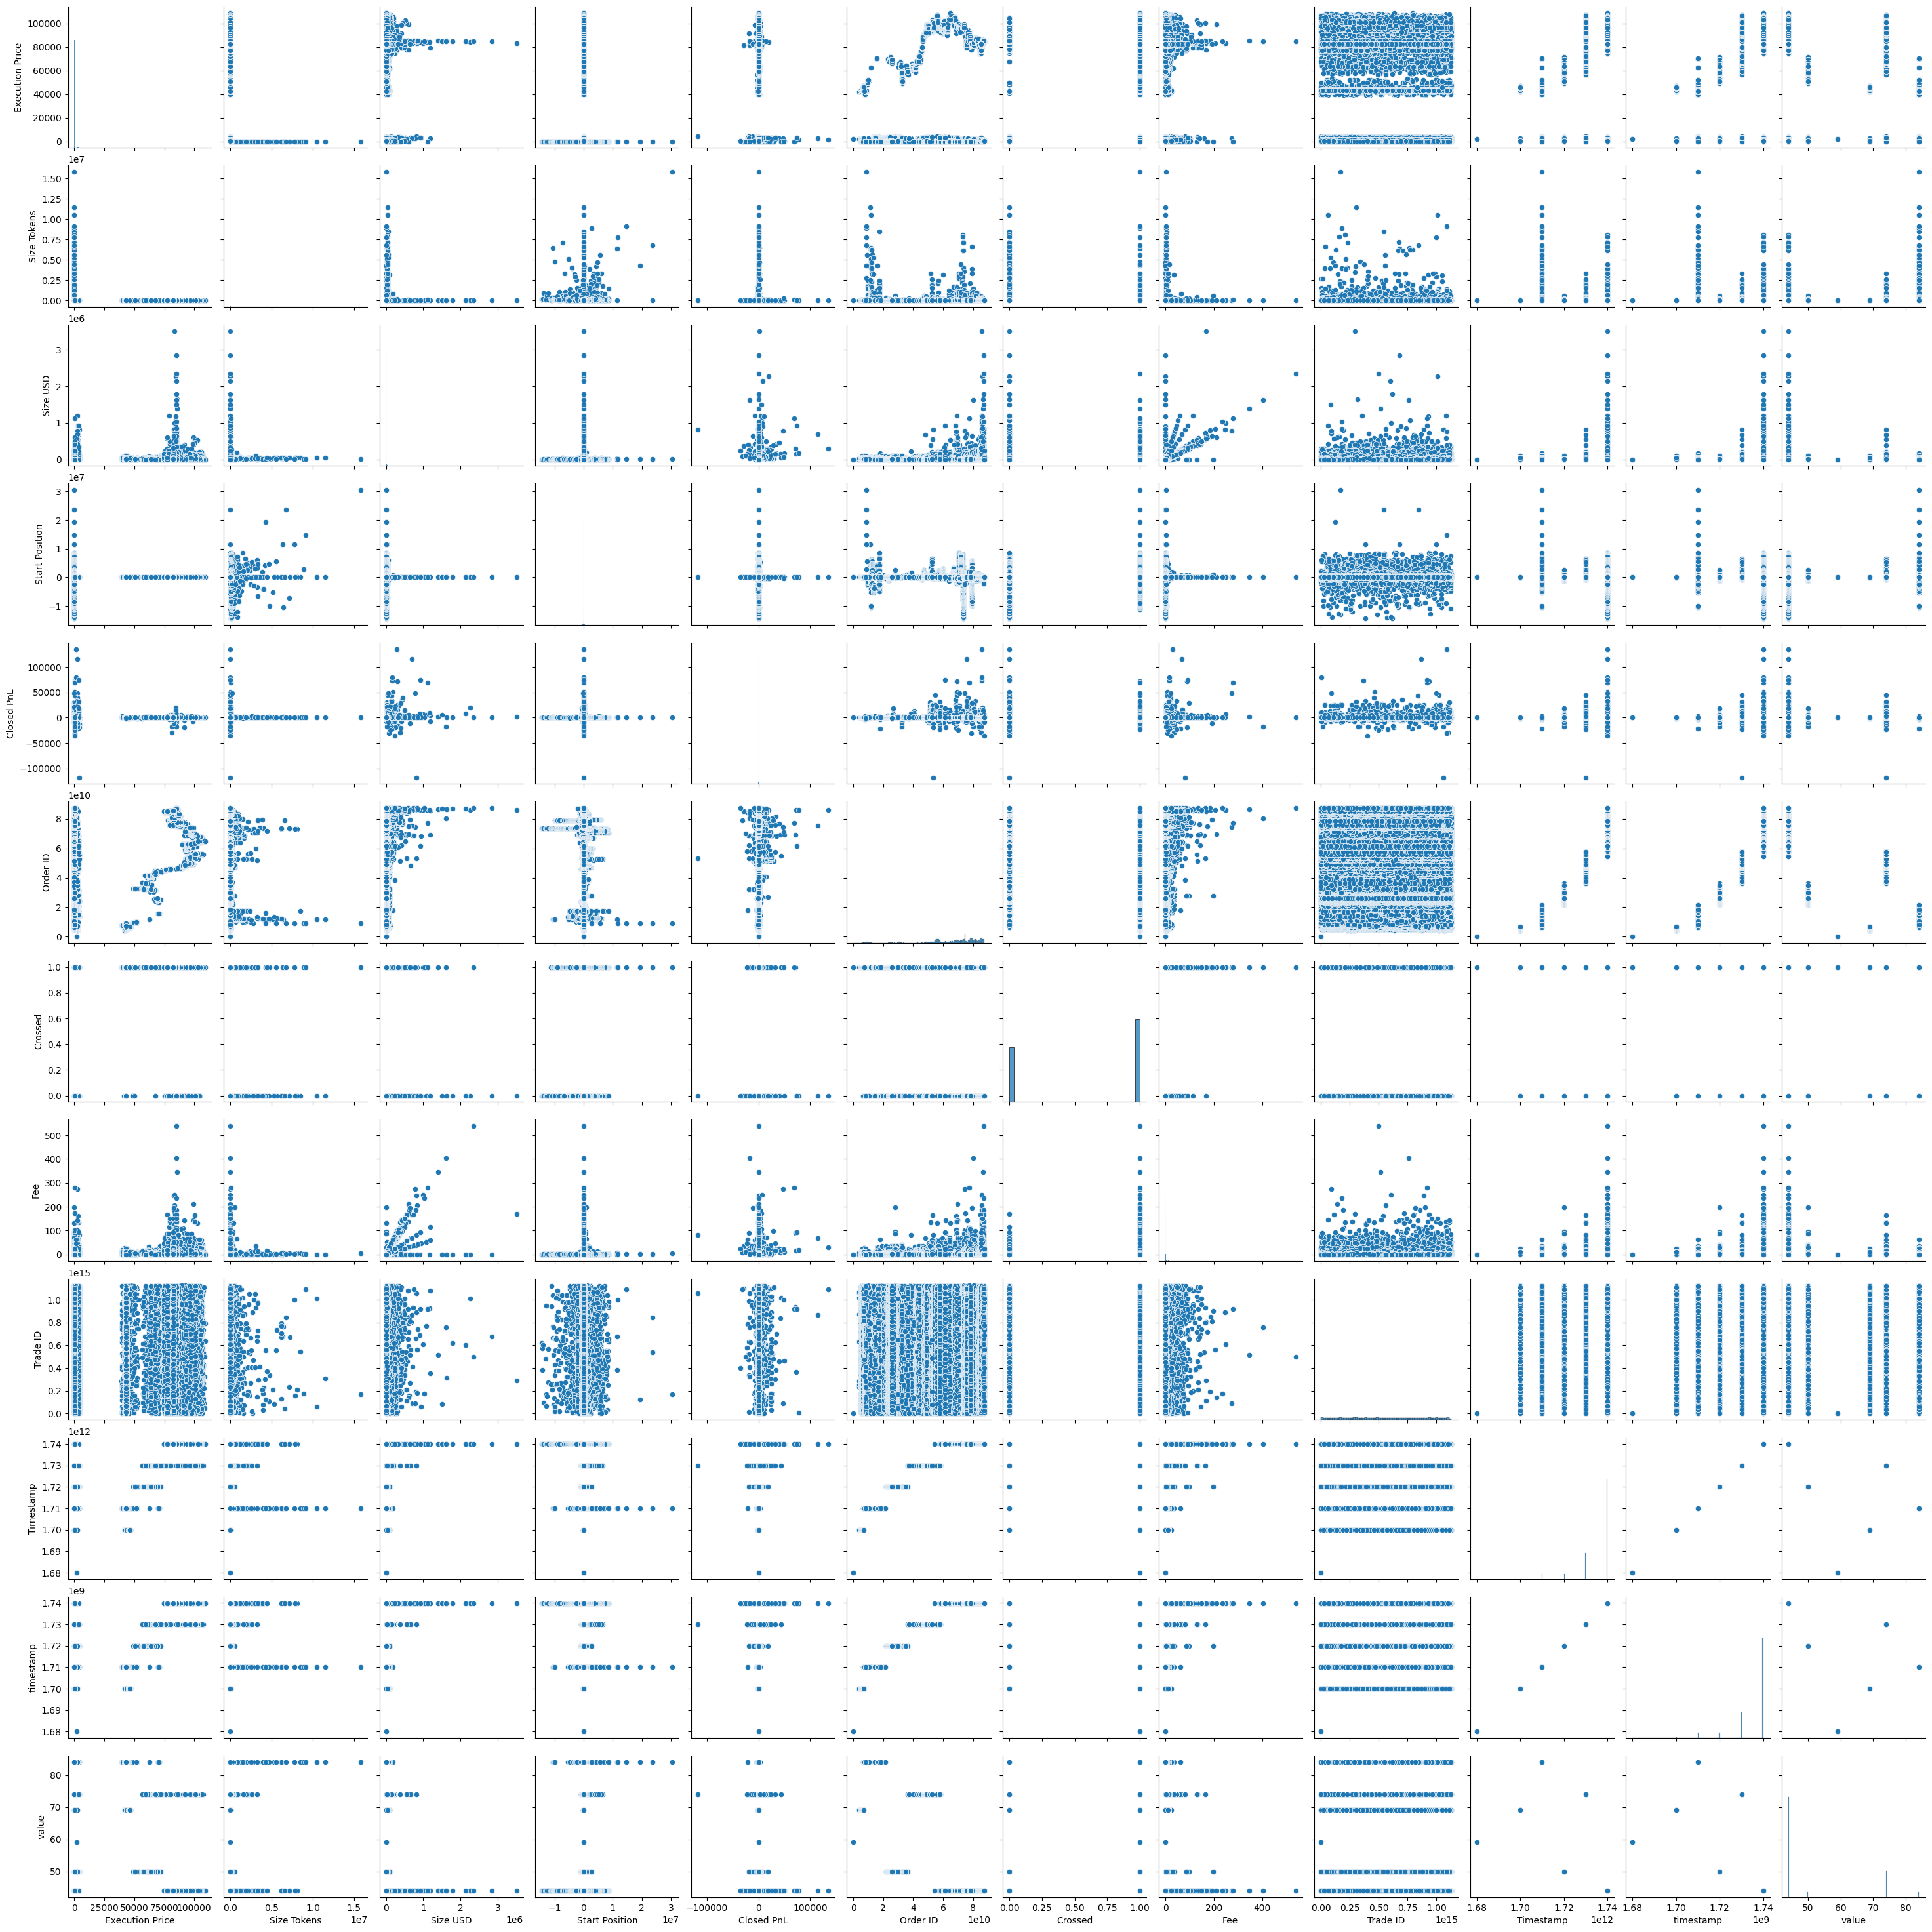

In [163]:
sns.pairplot(merged_df)
plt.show()